## PCA

In [ ]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
import plotly.graph_objects as go

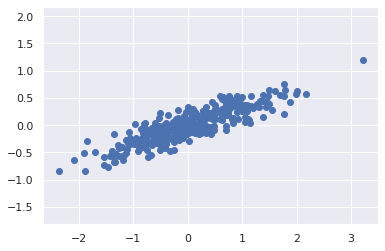

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 350)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # liczba "komponentów" jest taka sama jak wymiar danych, pozwala to znalezc "główne" osi w danych
pca.fit(X)

PCA(n_components=2)

In [ ]:
pca

PCA(n_components=2)

In [ ]:
print(pca.components_) # określają kierunek wektorów


[[ 0.94739038  0.3200804 ]
 [-0.3200804   0.94739038]]


In [ ]:
print(pca.explained_variance_) #określają długość^2 wektorów, czyli jak waże są poszczególne osie


[0.74757538 0.02065518]


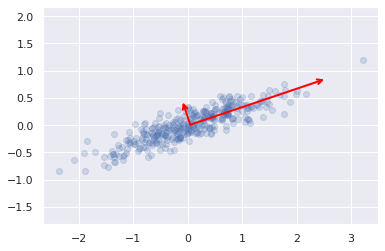

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="red")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [ ]:
pca.components_

array([[0.94739038, 0.3200804 ]])

In [ ]:
X_transformed = pca.fit_transform(X)

In [ ]:
X_transformed

In [ ]:
print('Rozmiar nieprzetworzonych danych:' ,X.shape)
print('Rozmiar zredukowanych danych:' ,X_transformed.shape)


Rozmiar nieprzetworzonych danych: (350, 2)
Rozmiar zredukowanych danych: (350, 1)


Tworzę 2-wymiarowe dane w celu wizualizacji

In [ ]:
X_two_dimensions = pca.inverse_transform(X_transformed)

In [ ]:
X_two_dimensions.shape

(350, 2)

Nie ma możliwości pokazania danych 2-wymiarowych i 1-wymiarowych na jednym wykresie, ponieważ dane są reprezentowane przez inne wymiary.
Ale można je pokazać na dwóch różnych wykresach.

In [ ]:
px.scatter(x=X[:, 0], y=X[:, 1], title='Stare dane')

Text(0.5, 1.0, 'Stare dane')

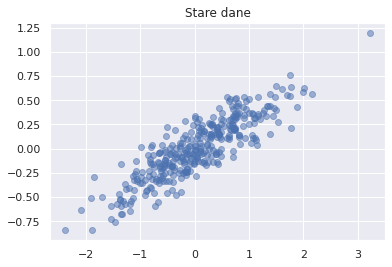

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title('Stare dane')

Text(0.5, 1.0, 'Nowe dane')

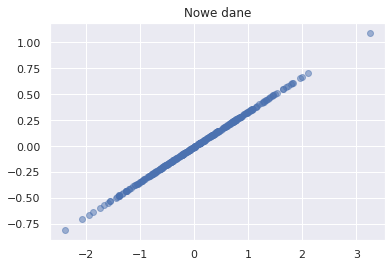

In [ ]:
plt.scatter(X_two_dimensions[:, 0], X_two_dimensions[:, 1], alpha=0.5)
plt.title('Nowe dane')

Wizualizacja danych rzeczywistych

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

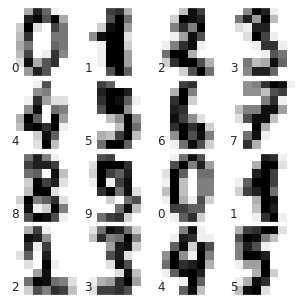

In [ ]:
# set up the figure
fig = plt.figure(figsize=(4, 4))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


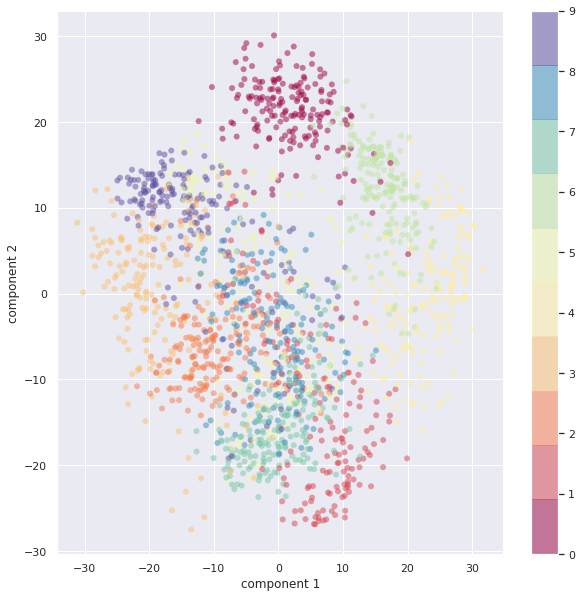

In [ ]:
fig = plt.figure(figsize=(10, 10))  # figure size in inches

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Kmeans


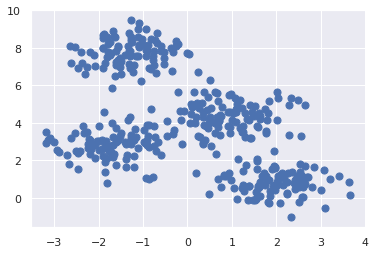

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.70, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
y_kmeans

array([1, 3, 3, 1, 3, 2, 0, 1, 3, 0, 2, 0, 1, 3, 3, 0, 3, 0, 1, 3, 3, 3,
       2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 3, 1, 3, 2, 0, 1, 0, 1, 3, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 2, 3, 2, 2, 3, 1, 0, 0, 3, 0, 0, 0, 0, 1, 3,
       0, 1, 3, 2, 3, 1, 3, 2, 0, 3, 1, 3, 2, 3, 3, 1, 0, 2, 1, 3, 3, 1,
       3, 0, 3, 0, 1, 3, 3, 2, 1, 0, 0, 0, 2, 0, 1, 1, 3, 2, 1, 2, 0, 3,
       3, 3, 1, 3, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2,
       2, 3, 1, 3, 2, 1, 2, 3, 1, 3, 3, 2, 3, 0, 1, 3, 0, 3, 0, 1, 0, 1,
       2, 3, 0, 3, 3, 3, 1, 3, 2, 3, 3, 2, 0, 0, 3, 2, 2, 2, 2, 0, 0, 0,
       1, 3, 1, 2, 1, 2, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 2, 2, 0,
       0, 1, 1, 3, 0, 0, 2, 1, 3, 2, 1, 2, 1, 1, 0, 0, 2, 0, 1, 2, 0, 2,
       3, 1, 2, 3, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 2, 0, 3, 0, 1, 3, 0, 1,
       1, 2, 0, 1, 2, 1, 0, 3, 3, 0, 3, 1, 2, 2, 1, 1, 0, 2, 1, 3, 3, 3,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 3, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 3, 1, 0, 3, 1, 0, 0, 1, 3, 2,

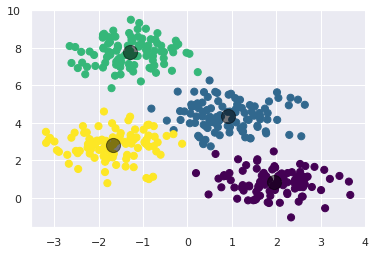

In [ ]:
# plot with color
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# add centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# clustering score - silhouette coefficient the closer to 1 the better the fit
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg

0.6264788489488764

Jak wybrać najlepszą liczbę klastrów?
- współcznnik silhuette  dla roznej liczby klastrow
- metoda łokciowa - na podstawie sumy kwadratów odległości  punktów wewnątrz klastrów do centroidów

In [ ]:

wcss = []
K = range(1, 10)

for i in K:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center

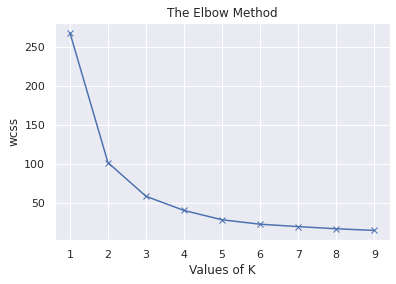

In [ ]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('wcss')
plt.title('The Elbow Method')
plt.show()

IRIS - Kmeans

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
data

In [ ]:
iris = data.data

In [ ]:
iris.shape

(150, 4)

In [ ]:
wcss = []
K = range(1, 10)

for i in K:
    kmeans = KMeans(n_clusters = i, random_state = 35)
    kmeans.fit(iris)
    wcss.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center

In [ ]:
fig = px.line(y=wcss, x=K, title='Suma kwadratów odległości punktów wewnątrz klastrów do centroidów')
fig.update_xaxes(title='K')
fig.update_yaxes(title='WCSS')
fig.show()

Based on the chart above, it can be concluded that 3 clusters will be suitable

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris)
y_kmeans_3 = kmeans.predict(iris)
centers_3_raw = kmeans.cluster_centers_

In [ ]:
# clustering score - silhouette coefficient the closer to 1 the better the fit
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(iris, y_kmeans_3)
print('Silhouette average for 3 clusters:', silhouette_avg)

Silhouette average for 3 clusters: 0.5528190123564095


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(iris)
y_kmeans_2 = kmeans.predict(iris)
centers_2_raw = kmeans.cluster_centers_

In [ ]:
# ocena klastrowania - współczynnik silhouette im bliżej 1 tym lepsze dopasowanie
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(iris, y_kmeans_2)
print('Silhouette average for 2 clusters:', silhouette_avg)

Silhouette average for 2 clusters: 0.6810461692117462


Dimensional reduction to visualize data

In [ ]:
pca = PCA(2)
after_clustering = pca.fit_transform(iris)

In [ ]:
after_clustering

In [ ]:
pca = PCA(2)
centers_2 = pca.fit_transform(centers_2_raw)

In [ ]:
pca = PCA(2)
centers_3 = pca.fit_transform(centers_3_raw)

Visualisation

In [ ]:
centers_2

array([[ 1.96439565e+00,  3.37661151e-16],
       [-1.96439565e+00,  3.37661151e-16]])

In [ ]:
fig1 = px.scatter(x=after_clustering[:,0], y=after_clustering[:,1], color=y_kmeans_2)
fig2 = px.scatter(x=centers_2[:,0], y=centers_2[:,1])
fig2.update_traces(marker_size=20, marker_color='black')
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

In [ ]:
fig1 = px.scatter(x=after_clustering[:,0], y=after_clustering[:,1], color=y_kmeans_3)
fig2 = px.scatter(x=centers_3[:,0], y=centers_3[:,1])
fig2.update_traces(marker_size=20, marker_color='black')
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

Conclusion: the visualization shows that a better solution is to divide into 3 clusters